# Naive Bayes

Olasılık temelli bir hesaplama tekniğidir.

Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.

Not: data da değişken sınıfı çoksa ve bunlar etkili etkili olduğu için indirgeyemiyorsak birde bu değişknelerden neredeyse yasısı
süreksiz değişknese(kategoric) güzel çalışan bir algoritmadir. Bu şekilde bir data seet varsa elinde kullanman gğzel olur.



In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
diabet=pd.read_csv("diabetes.csv")
df=diabet.copy()
df=df.dropna()
y=df["Outcome"]
ygraph=y
X=df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.30, random_state=42) #hocam dikkat ettiysen test size'ı burada 0.30 yaptık 
# diğer yaptığımız regrestonlarda 0.25 yapmıştık burada test setinin miktarının arttrdık yani. Çünkü veri setinde hemen bi alta bakalım 0-1 oranları
# nisbeten dengesiz. yani test setin az olursa zaten az olna 1 lerden iyice az alıp karşılaştırmada hata yapma ihtimali artar.
# veri setinde dengesizlik olduğunda test seti arttırmakta fayda var :))

# Hatta bağımli değişkenin sınıflarındaki dağılımı incelemekte fayda. onu da hemen alttakşi iki grfakikte yaptık


<AxesSubplot: >

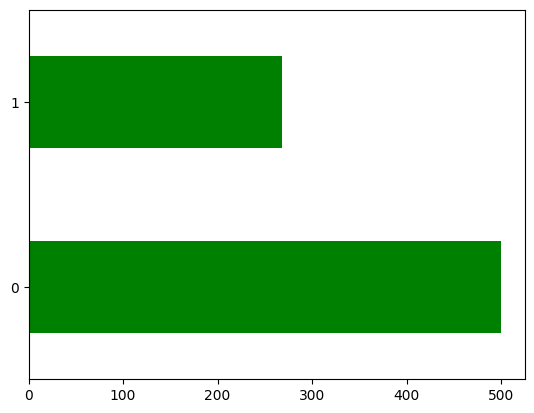

In [15]:
ygraph.value_counts().plot.barh(color="green")

<AxesSubplot: >

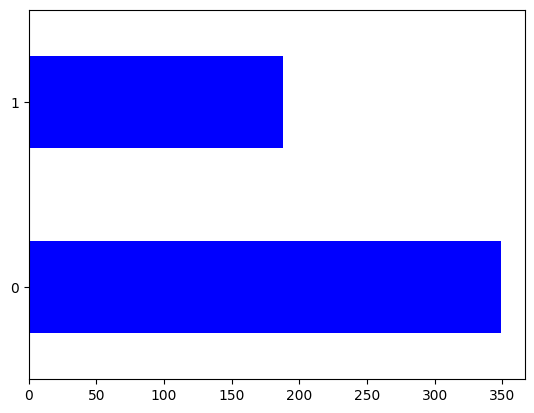

In [20]:
y_train.value_counts().plot.barh(color="blue")

<AxesSubplot: >

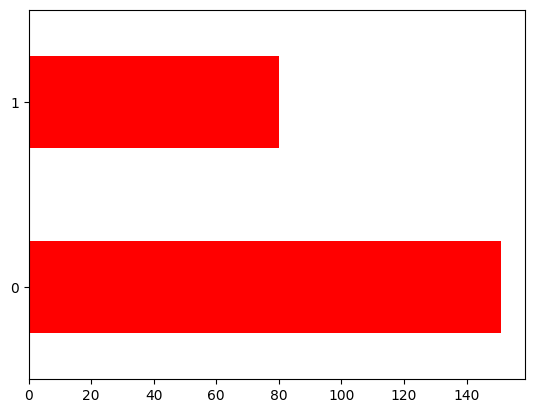

In [19]:
y_test.value_counts().plot.barh(color="r")

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

# model Doğrulama

Hocam tıpkı lojistik regresyon gibi burada da valide edilecek paremetre olmadığı içinn direkt model doğrulamam yapıyoruz tuning kısmı yok

In [22]:
accuracy_score(y_test,nb_model.predict(X_test))

0.7445887445887446

In [24]:
cross_val_score(nb_model,X_test, y_test,cv=10).mean()

0.775